# Imports and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# for easily switching between classmates, we set up a computer_name variable and all used a uniform folder structure within
import os
computer_name = 'JoelAndersonDig'
os.chdir(f'C:\\Users\\{computer_name}')

# RUN ONCE: The following sets up environments and installs

In [ ]:
# %conda create -n yolov5 python=3.9

In [ ]:
# %conda activate yolov5

In [ ]:
# %pip install ipykernel

In [ ]:
# %python -m ipykernel install --user --name yolov5 --display-name "yolov5"

In [ ]:
# %pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117

In [ ]:
# !git clone https://github.com/ultralytics/yolov5

In [ ]:
# %pip install -qr yolov5/requirements.txt  # install requirements for yolov5

In [44]:
%cd yolov5

C:\Users\JoelAndersonDig\yolov5


# Fine-tuning a YOLOv5 Model Using visDrone
As per YOLOv5's official documentation, we fine-tune visDrone using the maximum batch size our GPU supports using --batch -1.  
We use 300 epochs using YOLOv5's SGD optimizer and their default recemmended learning rate (0.01), decay (0.0005) and momentum (0.937) with 3 warmup epochs.

In [ ]:
# fine-tune training YOLOv5 small
# !python train.py --img 640 --batch -1 --epochs 200 --data VisDrone.yaml --weights yolov5s.pt --name PTvisDroneSmall

In [ ]:
# fine-tune training YOLOv5 large
# !python train.py --img 640 --batch -1 --epochs 200 --data VisDrone.yaml --weights yolov5l.pt --name PTvisDroneLarge

In [45]:
PTvisDroneLarge = pd.read_csv('runs\\train\\PTvisDroneLarge\\results.csv')
PTvisDroneSmall = pd.read_csv('runs\\train\\PTvisDroneSmall\\results.csv')

In [46]:
# standardize number of epochs run
PTvisDroneLarge = PTvisDroneLarge.iloc[:200,:]
PTvisDroneSmall = PTvisDroneSmall.iloc[:200,:]

In [47]:
PTvisDroneLarge.head(2)

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.12122,0.14505,0.046654,0.30484,0.20391,0.11745,0.051260,0.103230,0.23238,0.039485,0.070056,0.003327,0.003327
1,1,0.10588,0.16824,0.035154,0.48614,0.21215,0.16830,0.076478,0.099815,0.22835,0.035558,0.040034,0.006639,0.006639


In [48]:
# create function to calculate f1 score
def f1_scores(precision_vector, recall_vector):
    fs=[]
    for i in range(len(precision_vector)):
        fs.append(2* (precision_vector[i] * recall_vector[i])/(precision_vector[i] + recall_vector[i]))
    return fs

In [49]:
PTvisDroneSmall['f1_score'] = f1_scores(PTvisDroneSmall.iloc[:,4], PTvisDroneSmall.iloc[:,5])
PTvisDroneLarge['f1_score'] = f1_scores(PTvisDroneLarge.iloc[:,4], PTvisDroneLarge.iloc[:,5])

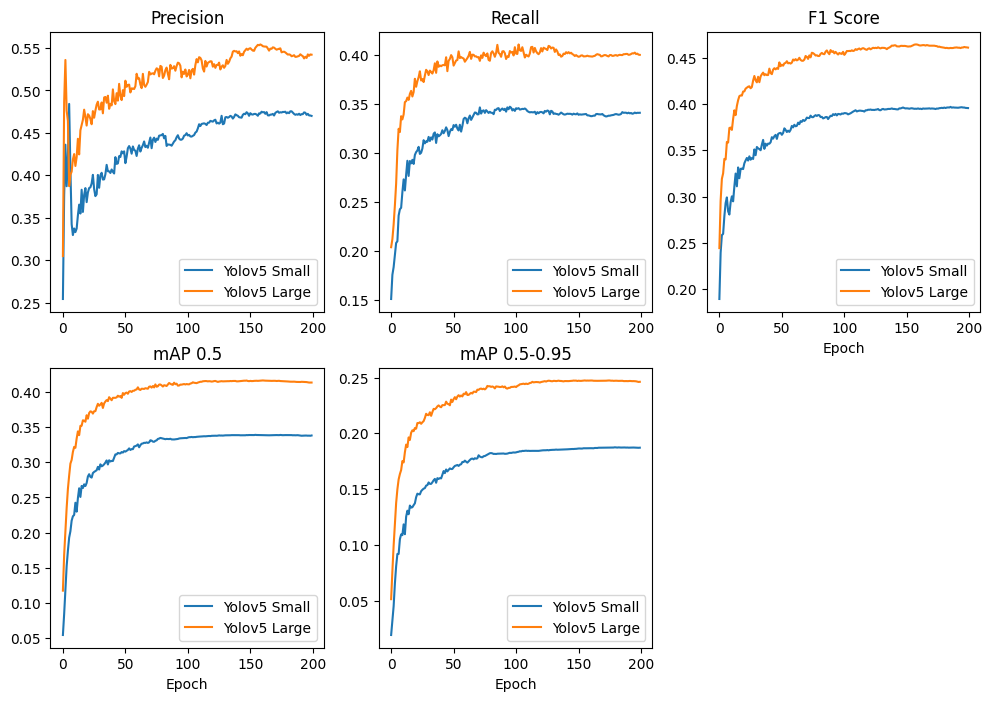

In [50]:
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
plt.plot(PTvisDroneSmall.iloc[:,4], label='Yolov5 Small')
plt.plot(PTvisDroneLarge.iloc[:,4], label='Yolov5 Large')
plt.legend(loc='lower right')
plt.title('Precision')


plt.subplot(2,3,2)
plt.plot(PTvisDroneSmall.iloc[:,5], label='Yolov5 Small')
plt.plot(PTvisDroneLarge.iloc[:,5], label='Yolov5 Large')
plt.legend(loc='lower right')
plt.title('Recall')

plt.subplot(2,3,3)
plt.plot(PTvisDroneSmall.iloc[:,14], label='Yolov5 Small')
plt.plot(PTvisDroneLarge.iloc[:,14], label='Yolov5 Large')
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.title('F1 Score')

plt.subplot(2,3,4)
plt.plot(PTvisDroneSmall.iloc[:,6], label='Yolov5 Small')
plt.plot(PTvisDroneLarge.iloc[:,6], label='Yolov5 Large')
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.title('mAP 0.5')

plt.subplot(2,3,5)
plt.plot(PTvisDroneSmall.iloc[:,7], label='Yolov5 Small')
plt.plot(PTvisDroneLarge.iloc[:,7], label='Yolov5 Large')
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.title('mAP 0.5-0.95')

plt.show()

# Fine-tuning a YOLOv5 Model using the Binghamton Landmine Dataset

In [ ]:
# fine-tune training YOLOv5 small using visDrone pre-trained weights
# !python train.py --img 640 --batch 4 --epochs 150 --data Binghamton.yaml --weights runs/train/PTvisDroneSmall/weights/best.pt --name visDroneSmall

In [ ]:
# fine-tune training YOLOv5 large using visDrone pre-trained weights
# !python train.py --img 640 --batch 4 --epochs 150 --data Binghamton.yaml --weights runs/train/PTvisDroneLarge/weights/best.pt --name visDroneLarge

In [ ]:
# fine-tune training YOLOv5 small using COCO pre-trained weights
# !python train.py --img 640 --batch 4 --epochs 150 --data Binghamton.yaml --weights yolov5s.pt --name COCOSmall

In [ ]:
# fine-tune training YOLOv5 large using COCO pre-trained weights
# !python train.py --img 640 --batch 4 --epochs 150 --data Binghamton.yaml --weights yolov5l.pt --name COCOLarge

In [9]:
visDroneSmall = pd.read_csv('runs\\train\\visDroneSmall\\results.csv')
visDroneLarge = pd.read_csv('runs\\train\\visDroneLarge\\results.csv')
COCOSmall = pd.read_csv('runs\\train\\COCOSmall\\results.csv')
COCOLarge = pd.read_csv('runs\\train\\COCOLarge\\results.csv')

In [10]:
visDroneSmall['f1_score'] = f1_scores(visDroneSmall.iloc[:,4], visDroneSmall.iloc[:,5])
visDroneLarge['f1_score'] = f1_scores(visDroneLarge.iloc[:,4], visDroneLarge.iloc[:,5])
COCOSmall['f1_score'] = f1_scores(COCOSmall.iloc[:,4], COCOSmall.iloc[:,5])
COCOLarge['f1_score'] = f1_scores(COCOLarge.iloc[:,4], COCOLarge.iloc[:,5])

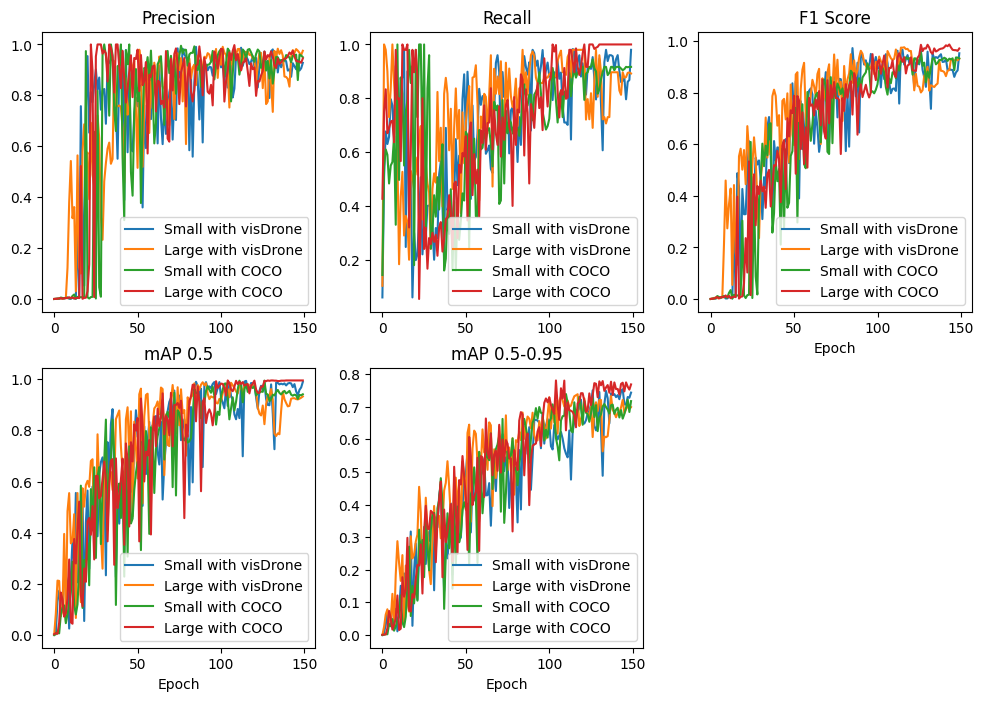

In [33]:
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
plt.plot(visDroneSmall.iloc[:,4], label='Small with visDrone')
plt.plot(visDroneLarge.iloc[:,4], label='Large with visDrone')
plt.plot(COCOSmall.iloc[:,4], label='Small with COCO')
plt.plot(COCOLarge.iloc[:,4], label='Large with COCO')
plt.legend(loc='lower right')
plt.title('Precision')

plt.subplot(2,3,2)
plt.plot(visDroneSmall.iloc[:,5], label='Small with visDrone')
plt.plot(visDroneLarge.iloc[:,5], label='Large with visDrone')
plt.plot(COCOSmall.iloc[:,5], label='Small with COCO')
plt.plot(COCOLarge.iloc[:,5], label='Large with COCO')
plt.legend(loc='lower right')
plt.title('Recall')

plt.subplot(2,3,3)
plt.plot(visDroneSmall.iloc[:,14], label='Small with visDrone')
plt.plot(visDroneLarge.iloc[:,14], label='Large with visDrone')
plt.plot(COCOSmall.iloc[:,14], label='Small with COCO')
plt.plot(COCOLarge.iloc[:,14], label='Large with COCO')
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.title('F1 Score')

plt.subplot(2,3,4)
plt.plot(visDroneSmall.iloc[:,6], label='Small with visDrone')
plt.plot(visDroneLarge.iloc[:,6], label='Large with visDrone')
plt.plot(COCOSmall.iloc[:,6], label='Small with COCO')
plt.plot(COCOLarge.iloc[:,6], label='Large with COCO')
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.title('mAP 0.5')

plt.subplot(2,3,5)
plt.plot(visDroneSmall.iloc[:,7], label='Small with visDrone')
plt.plot(visDroneLarge.iloc[:,7], label='Large with visDrone')
plt.plot(COCOSmall.iloc[:,7], label='Small with COCO')
plt.plot(COCOLarge.iloc[:,7], label='Large with COCO')
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.title('mAP 0.5-0.95')

plt.show()

## Moving Average with the Above
With fewer training images, we have jagged plots, so we use a moving average to smooth out the plots to make them more interpretable.

In [22]:
# define moving average function with a default of 5 steps
def moving_average(x, w=5):
    return np.convolve(x, np.ones(w), 'valid') / w

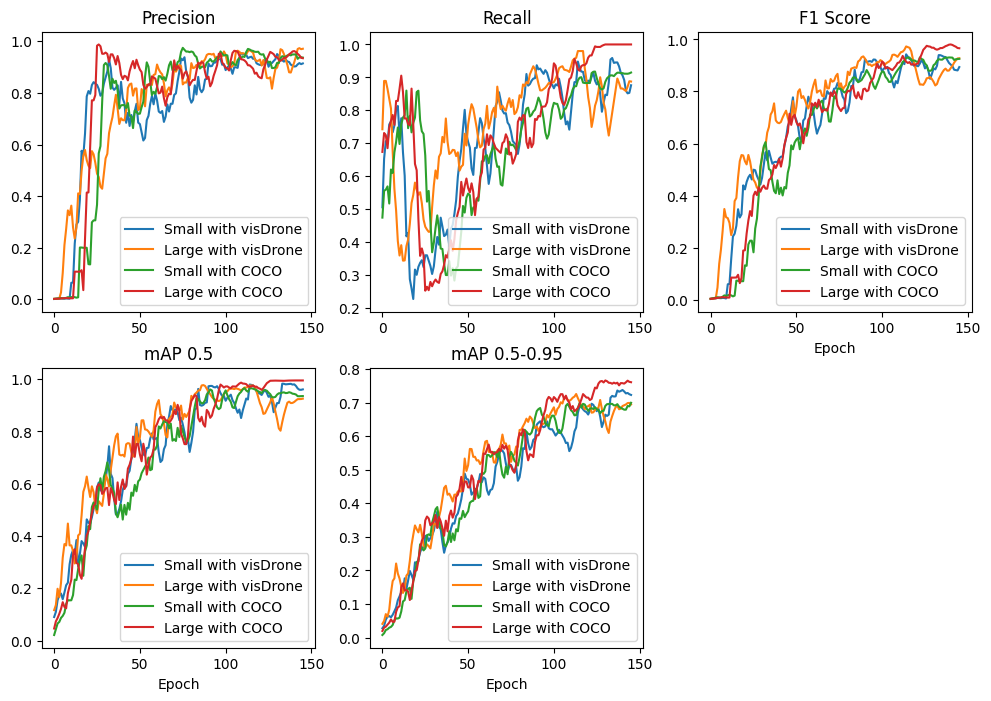

In [24]:
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
plt.plot(moving_average(visDroneSmall.iloc[:,4]), label='Small with visDrone')
plt.plot(moving_average(visDroneLarge.iloc[:,4]), label='Large with visDrone')
plt.plot(moving_average(COCOSmall.iloc[:,4]), label='Small with COCO')
plt.plot(moving_average(COCOLarge.iloc[:,4]), label='Large with COCO')
plt.legend(loc='lower right')
plt.title('Precision')

plt.subplot(2,3,2)
plt.plot(moving_average(visDroneSmall.iloc[:,5]), label='Small with visDrone')
plt.plot(moving_average(visDroneLarge.iloc[:,5]), label='Large with visDrone')
plt.plot(moving_average(COCOSmall.iloc[:,5]), label='Small with COCO')
plt.plot(moving_average(COCOLarge.iloc[:,5]), label='Large with COCO')
plt.legend(loc='lower right')
plt.title('Recall')

plt.subplot(2,3,3)
plt.plot(moving_average(visDroneSmall.iloc[:,14]), label='Small with visDrone')
plt.plot(moving_average(visDroneLarge.iloc[:,14]), label='Large with visDrone')
plt.plot(moving_average(COCOSmall.iloc[:,14]), label='Small with COCO')
plt.plot(moving_average(COCOLarge.iloc[:,14]), label='Large with COCO')
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.title('F1 Score')

plt.subplot(2,3,4)
plt.plot(moving_average(visDroneSmall.iloc[:,6]), label='Small with visDrone')
plt.plot(moving_average(visDroneLarge.iloc[:,6]), label='Large with visDrone')
plt.plot(moving_average(COCOSmall.iloc[:,6]), label='Small with COCO')
plt.plot(moving_average(COCOLarge.iloc[:,6]), label='Large with COCO')
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.title('mAP 0.5')

plt.subplot(2,3,5)
plt.plot(moving_average(visDroneSmall.iloc[:,7]), label='Small with visDrone')
plt.plot(moving_average(visDroneLarge.iloc[:,7]), label='Large with visDrone')
plt.plot(moving_average(COCOSmall.iloc[:,7]), label='Small with COCO')
plt.plot(moving_average(COCOLarge.iloc[:,7]), label='Large with COCO')
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.title('mAP 0.5-0.95')

plt.show()